In [44]:
import rastervision as rv
import PIL
import matplotlib.pyplot as plt
import numpy as np

import tile2vec as t2v
from tile2vec.datasets import (TileTripletsDataset, triplet_dataloader)
from experiments.experiments import Tile2VecExperiments

In [8]:
rv._registry.initialize_config(profile='tile2vec')
tmp_dir = '/opt/data/tmp/'

In [4]:
e = Tile2VecExperiments().exp_tile2vec('/opt/data/rv_root', 's3://raster-vision-iowa-wind-turbines/images/')

In [10]:
scenes = list(map(lambda s: s.create_scene(e.task, tmp_dir), e.backend.scenes[:10]))

In [19]:
dataloader = triplet_dataloader('naip', scenes, e.task.chip_size, augment=False,
                                batch_size=10, epoch_size=10,
                                shuffle=True, num_workers=1)

In [23]:
dataset = TileTripletsDataset(scenes, chip_size=e.task.chip_size, epoch_size=10,
                                  transform=None)

.

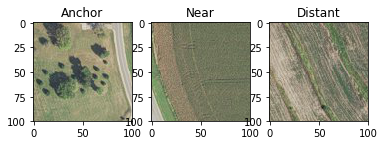

In [83]:
def display_triplet():
    r = dataset[0]
    f, axarr = plt.subplots(1,3)
    axarr[0].set_title('Anchor')
    axarr[1].set_title('Near')
    axarr[2].set_title('Distant')
    axarr[0].imshow(np.moveaxis(r['anchor'], 0, -1))
    axarr[1].imshow(np.moveaxis(r['neighbor'], 0, -1))
    axarr[2].imshow(np.moveaxis(r['distant'], 0, -1))
display_triplet()